## Load preprocessed data

In [1]:
import pandas as pd
df = pd.read_csv("../data/AERA02_AptitudeAssessment_Dataset_NLP_cleaned.csv")

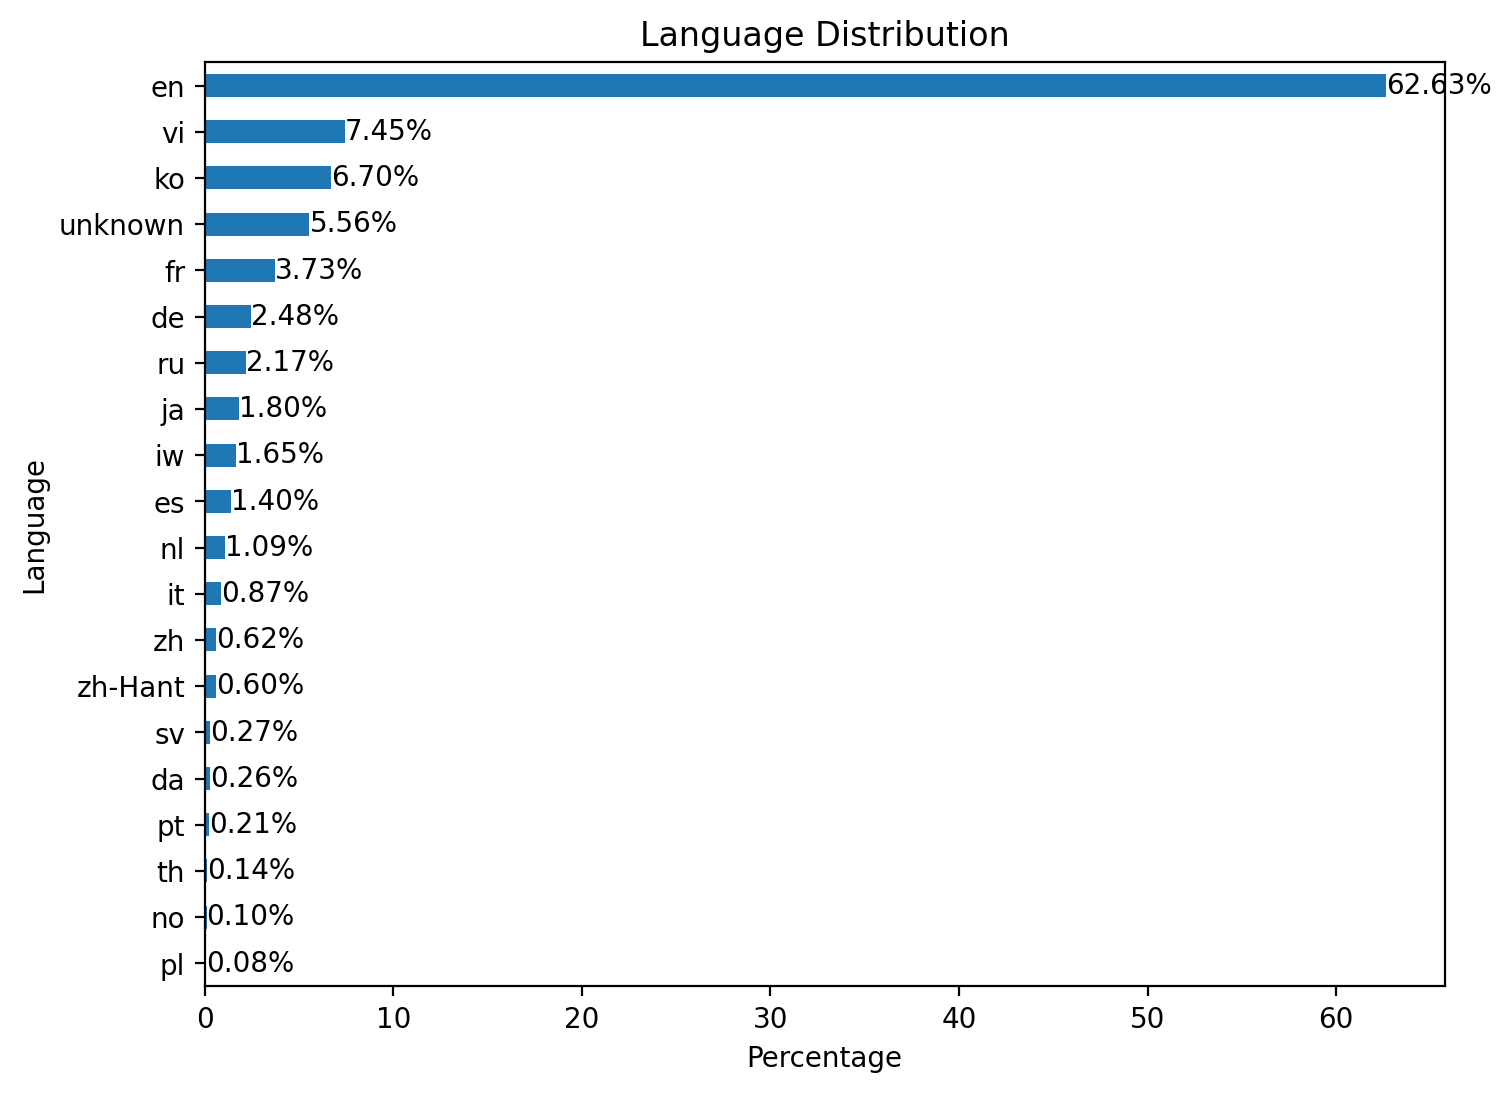

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=200)

# Calculate the percentage for each language
language_counts = df["language"].value_counts(normalize=True) * 100 
language_counts = language_counts[:20][::-1]

# Plot the horizontal bar chart with percentage labels
language_counts.plot(kind="barh")
plt.xlabel("Percentage")
plt.ylabel("Language")
plt.title("Language Distribution")

# Add percentage labels to the bars
for i, count in enumerate(language_counts):
    plt.text(count, i, f"{count:.2f}%", ha='left', va='center')

plt.show()

In [3]:
df["language"].unique()

array(['en', 'es', 'vi', 'zh-Hant', 'fr', 'de', 'nl', 'ja', 'ko',
       'unknown', 'it', 'zh', 'th', 'ru', 'id', 'pt', 'iw', 'sv', 'hu',
       'tr', 'da', 'pl', 'cs', 'no', 'fi', 'sk', 'el', 'ar', 'tl', 'ms',
       'haw', 'gl', 'af', 'hr', 'nn', 'sr', 'ur', 'ca', 'eu', 'is', 'ro',
       'hi', 'rw', 'fa', 'ta', 'sco', 'cy', 'sl', 'ne', 'zzp', 'my', 'bs'],
      dtype=object)

While I was exploring the dataset I've realised that there are a lot that aren't written in Vietnamese.

This got me wondering - how many the train dataset are in another language.

So, this is what I've found:

__The methodology:__
I just used the basic LanguageDetector from the spacy library and then extracted the language of the first 200 chars within a notebook. This process took about 60 mins.

__Key takeaways:__
There are 51 total distinct languages present in the notebooks, 62.63% of the notebooks are in English, 7.45% in Vietnamese, and 5.56% is unknown


In [4]:
df[df["language"] == "unknown"].sample(20)

score                          title review  \
122335    5.0                  3rd review -     NaN   
290970    4.0                   Nice staff .    NaN   
124424    5.0                  3rd review -     NaN   
289527    4.0                   Nice staff .    NaN   
287696    4.0                   Nice staff .    NaN   
116440    5.0                  3rd review -     NaN   
287678    4.0                   Nice staff .    NaN   
124603    5.0                  3rd review -     NaN   
504293    5.0  Vinpearl Condotel Beachfront.    NaN   
506054    5.0  Vinpearl Condotel Beachfront.    NaN   
521184    5.0  Vinpearl Condotel Beachfront.    NaN   
286392    4.0                   Nice staff .    NaN   
112018    5.0                  3rd review -     NaN   
121164    5.0                  3rd review -     NaN   
291830    4.0                   Nice staff .    NaN   
519435    5.0  Vinpearl Condotel Beachfront.    NaN   
129342    5.0                  3rd review -     NaN   
522742    5.0  Vinpearl Condotel Beachfront.    NaN   
516836    5.0  Vinpearl Condotel Beachfront.    NaN   
108825    5.0                  3rd review -     NaN   

                          title2review language  
122335                  3rd review -    unknown  
290970                   Nice staff .   unknown  
124424                  3rd review -    unknown  
289527                   Nice staff .   unknown  
287696                   Nice staff .   unknown  
116440                  3rd review -    unknown  
287678                   Nice staff .   unknown  
124603                  3rd review -    unknown  
504293  Vinpearl Condotel Beachfront.   unknown  
506054  Vinpearl Condotel Beachfront.   unknown  
521184  Vinpearl Condotel Beachfront.   unknown  
286392                   Nice staff .   unknown  
112018                  3rd review -    unknown  
121164                  3rd review -    unknown  
291830                   Nice staff .   unknown  
519435  Vinpearl Condotel Beachfront.   unknown  
129342                  3rd review -    unknown  
522742  Vinpearl Condotel Beachfront.   unknown  
516836  Vinpearl Condotel Beachfront.   unknown  
108825                  3rd review -    unknown

In [5]:
df[df["language"] == "vi"].sample(20)

score                                              title  \
536528     1.0                                            Quá tệ.   
1038865    5.0                                  Đánh giá lưu trú.   
483712     5.0  Nếu có dịp quay lại Nha trang mình sẽ vẫn đặt ...   
538069     3.0                                  Minh Thanh hotel.   
639658     3.0  SUNSET SUNATO Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ...   
631739     3.0  SUNSET SUNATO Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ...   
629966     3.0  SUNSET SUNATO Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ...   
662707     5.0                 Kỳ nghỉ tết ý nghĩa cùng gia đình.   
540556     5.0                                     Khach san dep.   
629527     3.0  SUNSET SUNATO Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ...   
319194     5.0                             Trải nghiệm tuyệt vời.   
795520     5.0                      một nơi dừng chân tuyệt vời !   
41063      5.0                                  Highly recommend.   
634485     3.0  SUNSET SUNATO Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ...   
641199     3.0  SUNSET SUNATO Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ...   
978835     5.0                                       Dịch vụ tốt.   
317001     5.0                             Trải nghiệm tuyệt vời.   
372962     5.0          Khách sạn mới, đẹp, nhân viên thân thiện.   
647969     3.0  SUNSET SUNATO Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ...   
78765      5.0                                               Tốt.   

                                                    review  \
536528   Biết đến khách sạn thông qua nhiều nguồn khác ...   
1038865  Tôi đã ở đây 2 ngày tôi thực sự thích không gi...   
483712   Tuần rồi mình có trải nghiệm lưu trú ở KS 3 ng...   
538069   Hai lần đến Đà Lạt mình đều ở khách sạn này, k...   
639658                                                 NaN   
631739                                                 NaN   
629966                                                 NaN   
662707   Lần đầu cùng gia đình thăm quan vinh Hạ Long t...   
540556   Toi ở khách sạn này nhiều lần. khách sạn có bả...   
629527                                                 NaN   
319194   tôi đã có một trải nghiệm tuyệt vời khi ở đây ...   
795520   Tôi là người Sài Gòn 10 năm xa quê Hương !  Đâ...   
41063    Khách sạn rất là sạch sẽ, phục vụ rất tốt. Vị ...   
634485                                                 NaN   
641199                                                 NaN   
978835   Tôi rất hài lòng về dịch vụ khách sạn, ăn sáng...   
317001   Khách sạn rất sang trọng,đồ ăn nhà hàng rất ng...   
372962   Khách sạn xanh, sạch, đẹp, xịn. Phòng đầy đủ t...   
647969                                                 NaN   
78765    Khách sạn sạch sẽ, buổi sang ăn sang rất phong...   

                                              title2review language  
536528   Quá tệ. Biết đến khách sạn thông qua nhiều ngu...       vi  
1038865  Đánh giá lưu trú. Tôi đã ở đây 2 ngày tôi thực...       vi  
483712   Nếu có dịp quay lại Nha trang mình sẽ vẫn đặt ...       vi  
538069   Minh Thanh hotel. Hai lần đến Đà Lạt mình đều ...       vi  
639658   SUNSET SUNATO Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ...       vi  
631739   SUNSET SUNATO Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ...       vi  
629966   SUNSET SUNATO Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ...       vi  
662707   Kỳ nghỉ tết ý nghĩa cùng gia đình. Lần đầu cùn...       vi  
540556   Khach san dep. Toi ở khách sạn này nhiều lần. ...       vi  
629527   SUNSET SUNATO Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ...       vi  
319194   Trải nghiệm tuyệt vời. tôi đã có một trải nghi...       vi  
795520   một nơi dừng chân tuyệt vời ! Tôi là người Sài...       vi  
41063    Highly recommend. Khách sạn rất là sạch sẽ, ph...       vi  
634485   SUNSET SUNATO Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ...       vi  
641199   SUNSET SUNATO Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ...       vi  
978835   Dịch vụ tốt. Tôi rất hài lòng về dịch vụ khách...       vi  
317001   Trải nghiệm tuyệt vời. Khách sạn rất sang trọn...       v

<Axes: >

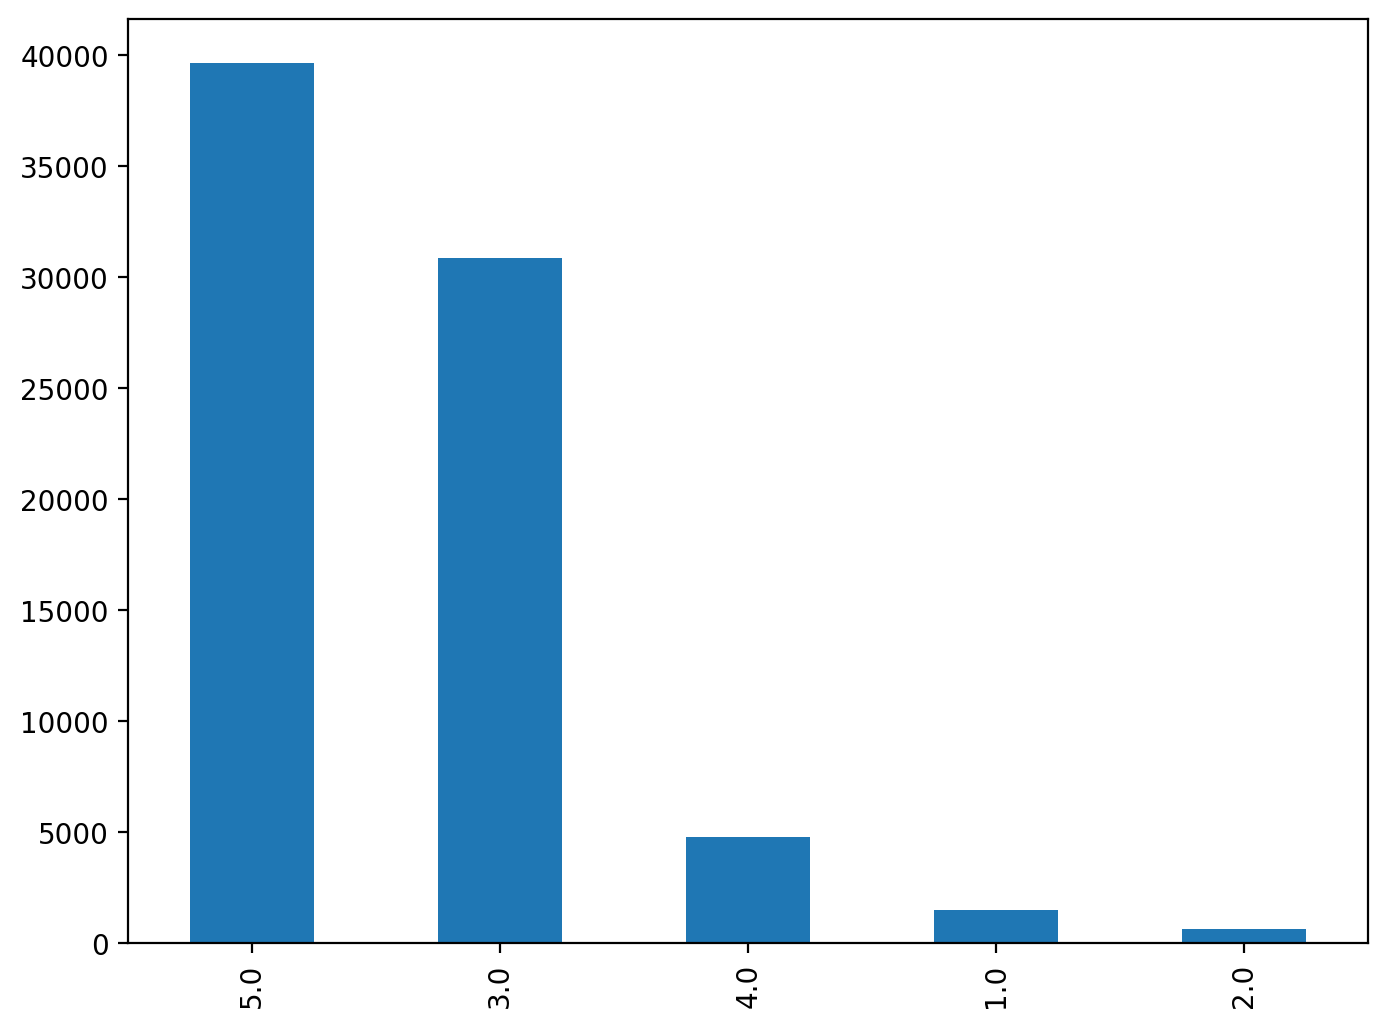

In [6]:
vi_df = df[df["language"] == "vi"].copy().reset_index(drop=True)

plt.figure(figsize=(8, 6), dpi=200)
vi_df["score"].value_counts().plot(kind="bar")

In [7]:
vi_df[vi_df.duplicated()]["score"].value_counts()

3.0    29353
5.0       56
4.0       15
1.0        2
Name: score, dtype: int64

In [8]:
import numpy as np
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_columns', None)
def create_df(df):
    not_numeric_cols = df.select_dtypes(exclude=np.number)
    value_ratios = [dict(df[col].value_counts(dropna=False, normalize=True).mul(100).round(1).astype(str) + '%')
                    for col in not_numeric_cols.columns]
    missing_ratio = round(not_numeric_cols.isna().sum()*100/len(not_numeric_cols), 1)
    num_values = [df[col].nunique() for col in not_numeric_cols.columns]
    not_numeric_cols.reset_index(drop=True)
    my_index = ['missing_ratio', 'num_values', 'value_ratios']
    cat_col_info_df = pd.DataFrame(np.array([missing_ratio, num_values, value_ratios]),index=my_index, columns=not_numeric_cols.columns)
    return cat_col_info_df


describe_df = create_df(vi_df[vi_df["score"] == 3.0])
describe_df

title  \
missing_ratio                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  0.0   
num_values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    1300   
value_ratios   {'SUNSET SUNATO Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ ĐẸP NGẮM HOÀNG HÔN.': '95.2%', 'Tạm được.': '0.1%', 'Tạm ổn.': '0.1%', 'Bình thường.': '0.1%', 'Trung bình.': '0.0%', 'Thất vọng.': '0.0%', 'Tốt.': '0.0%', 'Ổn.': '0.0%', 'Khá ổn.': '0.0%', 'Không hài lòng.': '0.0%', 'Chấp nhận được.': '0.0%', 'Khách sạn mới.': '0.0%', 'Nghỉ dưỡng.': '0.0%', 'Khách sạn bình thường.': '0.0%', 'Không như mong đợi.': '0.0%', 'Khá.': '0.0%', 'tạm ổn.': '0.0%', 'Hơi thất vọng.': '0.0%', 'Vị trí đẹp.': '0.0%', 'Khá ...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            review  \
missing_ratio                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 95.2   
num_values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    1492   
value_ratios   {nan: '95.2%', 'Tôi đã ở đây 2 phòng 1 đêm ngày 19/4 . Thật sự về tất cả nhân viên trong resort là 1 điểm cộng lớn , mọi người đều thân thiện và lịch sự . Tôi cho 3 điểm vì lý do thấy mình giống bị lừa dối khi dùng dịch vụ tại resort .  1) Khi chúng tôi vào check in lễ tân có bảo là khi nào a đi xuống hồ bơi sẽ có xe điện chở a đi vì đoạn đường đi bộ xa , và khi tôi xuống thì lại ko có xe điện bảo bận , ok tôi có thể đi bộ , xong bạn tôi phòng khác xuống đi ra hồ bơi xe vẫn bận và bạn tôi lạ...   

                                                                                                                                                                                                                                                                                                                                                                           

In [9]:
vi_df.shape

(77395, 5)

There are a lot of duplicate values with title = "SUNSET SUNATO Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ ĐẸP NGẮM HOÀNG HÔN.". This could be a spam signal, then I will remove these duplicates from the dataset.

In [10]:
index2remove = vi_df[vi_df["title"] == "SUNSET SUNATO Ở ĐÂY CHỦ YẾU LÀ ĐƯỢC CÁI VỊ TRÍ ĐẸP NGẮM HOÀNG HÔN."][1:].index
vi_df = vi_df.drop(index2remove)
vi_df.reset_index(drop=True, inplace=True)
vi_df

score                                   title  \
0        5.0                        TRẢI NGHIỆM TỐT.   
1        5.0                              Tuyệt vời.   
2        5.0  trải nghiệm tuyệt vời tại Brandi Gate.   
3        1.0                          Tồi , lừa đảo.   
4        1.0                               Very bad.   
...      ...                                     ...   
48038    5.0                     Lần thứ 2 quay lại.   
48039    4.0            Giá rẻ nhân viên thân thiện.   
48040    5.0                     Giá rẻ, đồ ăn ngon.   
48041    5.0  Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng.   
48042    5.0                               Công tác.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    review  \
0                                                                                                                                                                                                                                                                                                            Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon Hồ bơi đẹp Vị trí di chuyển thuận lợi gần Hồ Tây Phòng nhỏ nhưng sang trọng rất đẹp, phòng có View thoáng  Có khu tầng cao rooftop rất thích . Cảm ơn khách sạn    
1                                                                                                                                                                                                                    Khách sạn mới, sạch sẽ, có bar và bể bơi ở tầng thượng, có view đẹp nhìn ra sông, vị trí rất thuận tiện cho việc đi lại, phòng nghỉ bố trí hài hòa, tiện nghi, ăn sáng ngon. Tôi hài lòng từ khâu đón tiếp đến cách phục vụ của khách sạn, nhân viên rất nhiệt tình và chu đáo. Chắc chắn sẽ ghé lại.   
2                                                                                                                                                                                  Khách sạn mới 100% tọa lạc trước sông Tô Lịch, ngay cửa ngõ sân bay Nội Bài vào thành phố, rất thuận tiện cho khách đi công tác. Phòng nhỏ xinh xắn, tiện nghi, yên tĩnh,view nhìn ra sông rất thơ mộng. Nhân viên cực kỳ dễ thương, hòa đồng thân thiện và lịch thiệp. Sẽ ghé lại Brandi Gate trong các chuyến công tác Hà nội sắp tới   
3      Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có việc gấp bay về nên bạn của mình trả trước 1 phòng ,dư lại 2 đêm . Đã không hoàn tiền còn lấy lại phòng đó cho khách khác vào ở . Còn lại 1 của mình, đến ngày check out, mình xin trả phòng muộn thì nhân viên bắt tính phụ phí . Mình vẫn chấp nhận, nhân viên lễ tân nói đến 14:00 thì 200k mình Ok, nhưng vì chuyến bay mình hơi muộn chút nên xin linh hoạt cho mình đến 15:00 , thì không chịu, nhất định phải đúng giờ ( dù gì mình cũng dư 1 phòng 2 đêm ...   
4                                                                                                                                                                                                                                                                                            Diện tích phòng quá nhỏ. Trang thiết bị quá cũ kỹ.  Toilet khong được sạch sẽ và tương đối kinh khủng. Tôi đặt phòng family mà diện tích chỉ  đủ cho 2 giường và extra bed.  Tóm lại,  tôi không hài lòng về dịch vụ tại đây!   
...                                                                                                                                                                                                                                                                               

In [11]:
vi_df.shape

(48043, 5)

## Text processing

In [83]:
# !pip install wordcloud
# !pip install seaborn

To make your changes take effect please reactivate your environment
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [12]:
import re
import string
def process_text(text):
    text = re.sub("(&#\d+;)", "", text)
    text = re.sub("([\/-])", " ", text)
    text = re.sub("(<.*?>)", "" ,text)
    text = re.sub("(^https?:\/\/\S+)", "", text)
    text = "".join([i for i in text if i not in string.punctuation + "…"])
    text = text.lower()
    return text

def process_corpus(corpus):
    _WORD_SPLIT = re.compile("([.,!?\"/':;)(])")
    def basic_tokenizer(sentence):
        words = []
        for space_separated_fragment in sentence.strip().split():
            words.extend(_WORD_SPLIT.split(space_separated_fragment))
        return [w.lower() for w in words if w != '' and w != ' ' and w not in string.punctuation]
    
    corpus = corpus.replace("\n", " ").split(" ")

In [13]:
vi_df.isna().sum()

score            0
title            0
review          18
title2review     0
language         0
dtype: int64

In [16]:
vi_df.fillna("", inplace=True)

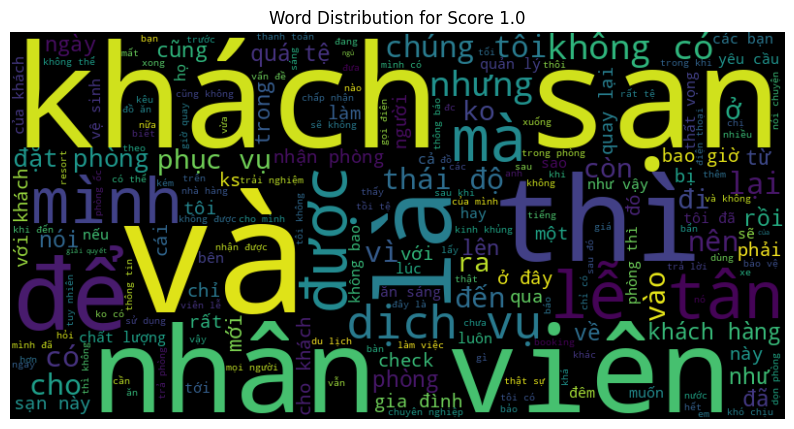

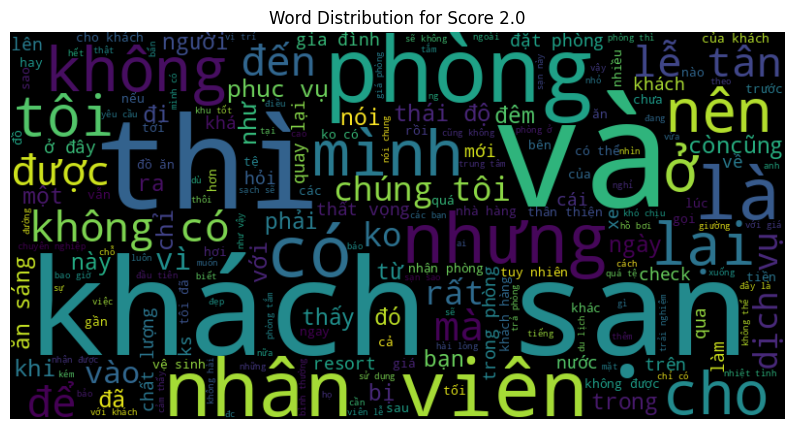

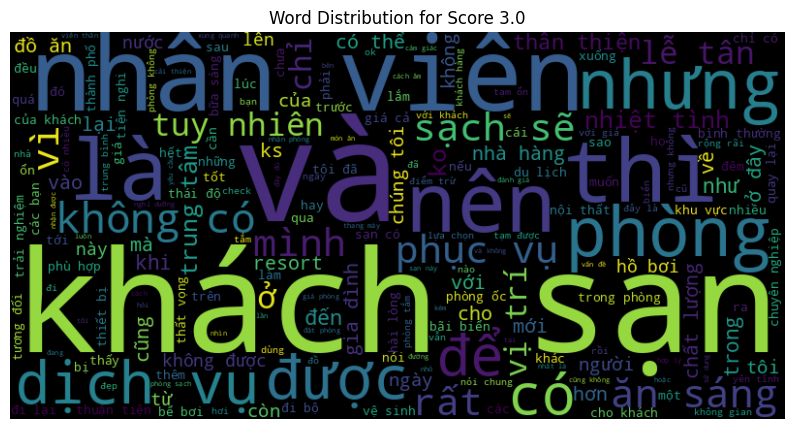

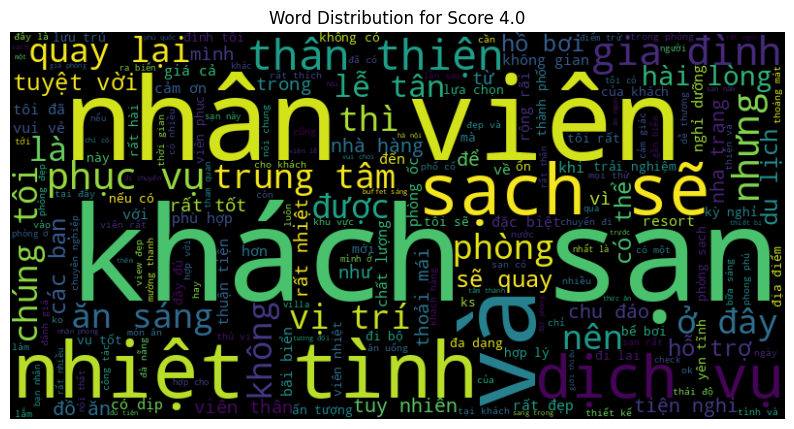

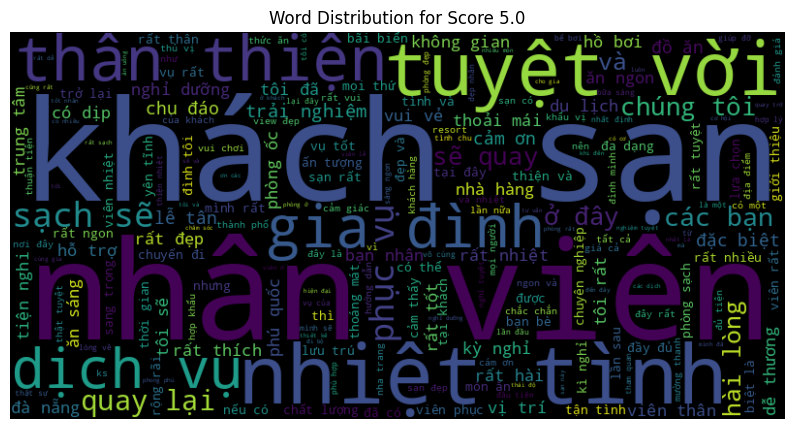

In [17]:
from wordcloud import WordCloud
from collections import Counter

# Group the dataframe by score
grouped_df = vi_df.groupby('score')

score_dict = {}

# Plot word distribution for each score
for score, group in grouped_df:
    # Concatenate all reviews for the score
    text = process_text(' '.join(group['title']))
    
    score_dict[score] = Counter(text.split())
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400).generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Distribution for Score {score}')
    plt.axis('off')
    plt.show()


In [15]:
with open("../data/external/stopwords.txt") as f:
    stopwords = f.readlines()
    stopwords = [word.strip() for word in stopwords]
stopwords

['a lô',
 'a ha',
 'ai',
 'ai ai',
 'ai nấy',
 'ai đó',
 'alô',
 'amen',
 'anh',
 'anh ấy',
 'ba',
 'ba ba',
 'ba bản',
 'ba cùng',
 'ba họ',
 'ba ngày',
 'ba ngôi',
 'ba tăng',
 'bao giờ',
 'bao lâu',
 'bao nhiêu',
 'bao nả',
 'bay biến',
 'biết',
 'biết bao',
 'biết bao nhiêu',
 'biết chắc',
 'biết chừng nào',
 'biết mình',
 'biết mấy',
 'biết thế',
 'biết trước',
 'biết việc',
 'biết đâu',
 'biết đâu chừng',
 'biết đâu đấy',
 'biết được',
 'buổi',
 'buổi làm',
 'buổi mới',
 'buổi ngày',
 'buổi sớm',
 'bà',
 'bà ấy',
 'bài',
 'bài bác',
 'bài bỏ',
 'bài cái',
 'bác',
 'bán',
 'bán cấp',
 'bán dạ',
 'bán thế',
 'bây bẩy',
 'bây chừ',
 'bây giờ',
 'bây nhiêu',
 'bèn',
 'béng',
 'bên',
 'bên bị',
 'bên có',
 'bên cạnh',
 'bông',
 'bước',
 'bước khỏi',
 'bước tới',
 'bước đi',
 'bạn',
 'bản',
 'bản bộ',
 'bản riêng',
 'bản thân',
 'bản ý',
 'bất chợt',
 'bất cứ',
 'bất giác',
 'bất kì',
 'bất kể',
 'bất kỳ',
 'bất luận',
 'bất ngờ',
 'bất nhược',
 'bất quá',
 'bất quá chỉ',
 'bất thình l

In [26]:
# reference: https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert/notebook#3.-score-and-N-grams
from collections import defaultdict
import seaborn as sns 
import random

def generate_ngrams(text, n_gram=1):
    text = process_text(text)
    token = [token for token in text.lower().split(' ') if token != '']
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

def create_df(n_gram):
    
    list_df = []
    
    unique_scores = vi_df['score'].unique().tolist()
    unique_scores.sort()
    for score in unique_scores:
        ngrams = defaultdict(int)

        for tweet in vi_df[vi_df['score'] == score]['title']:
            for word in generate_ngrams(tweet, n_gram):
                ngrams[word] += 1
                
        df_ngrams = pd.DataFrame(sorted(ngrams.items(), key=lambda x: x[1])[::-1])
        list_df.append(df_ngrams)

    return list_df
    
# Unigrams

unigrams = create_df(1)

# Bigrams
        
bigrams = create_df(2)

# Trigrams
        
trigrams = create_df(3)
def draw_ngrams(typ, list_df, N):
    fig, axes = plt.subplots(ncols=len(list_df), figsize=(18, 30), dpi=100)
    plt.tight_layout()
    
    for i, _df in enumerate(list_df):
        sns.barplot(y=_df[0].values[:N], x=_df[1].values[:N], ax=axes[i], color=random.choice(sns.color_palette()))


    for i, _df in enumerate(list_df):
        axes[i].spines['right'].set_visible(False)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', labelsize=18)
        axes[i].tick_params(axis='y', labelsize=18)
        axes[i].set_title(f'Score = {i + 1} ', fontsize=15)

    # axes[0].set_title(f'Top {N} most common {typ} in Disaster Tweets', fontsize=15)
    # axes[1].set_title(f'Top {N} most common {typ} in Non-disaster Tweets', fontsize=15)

    plt.show()

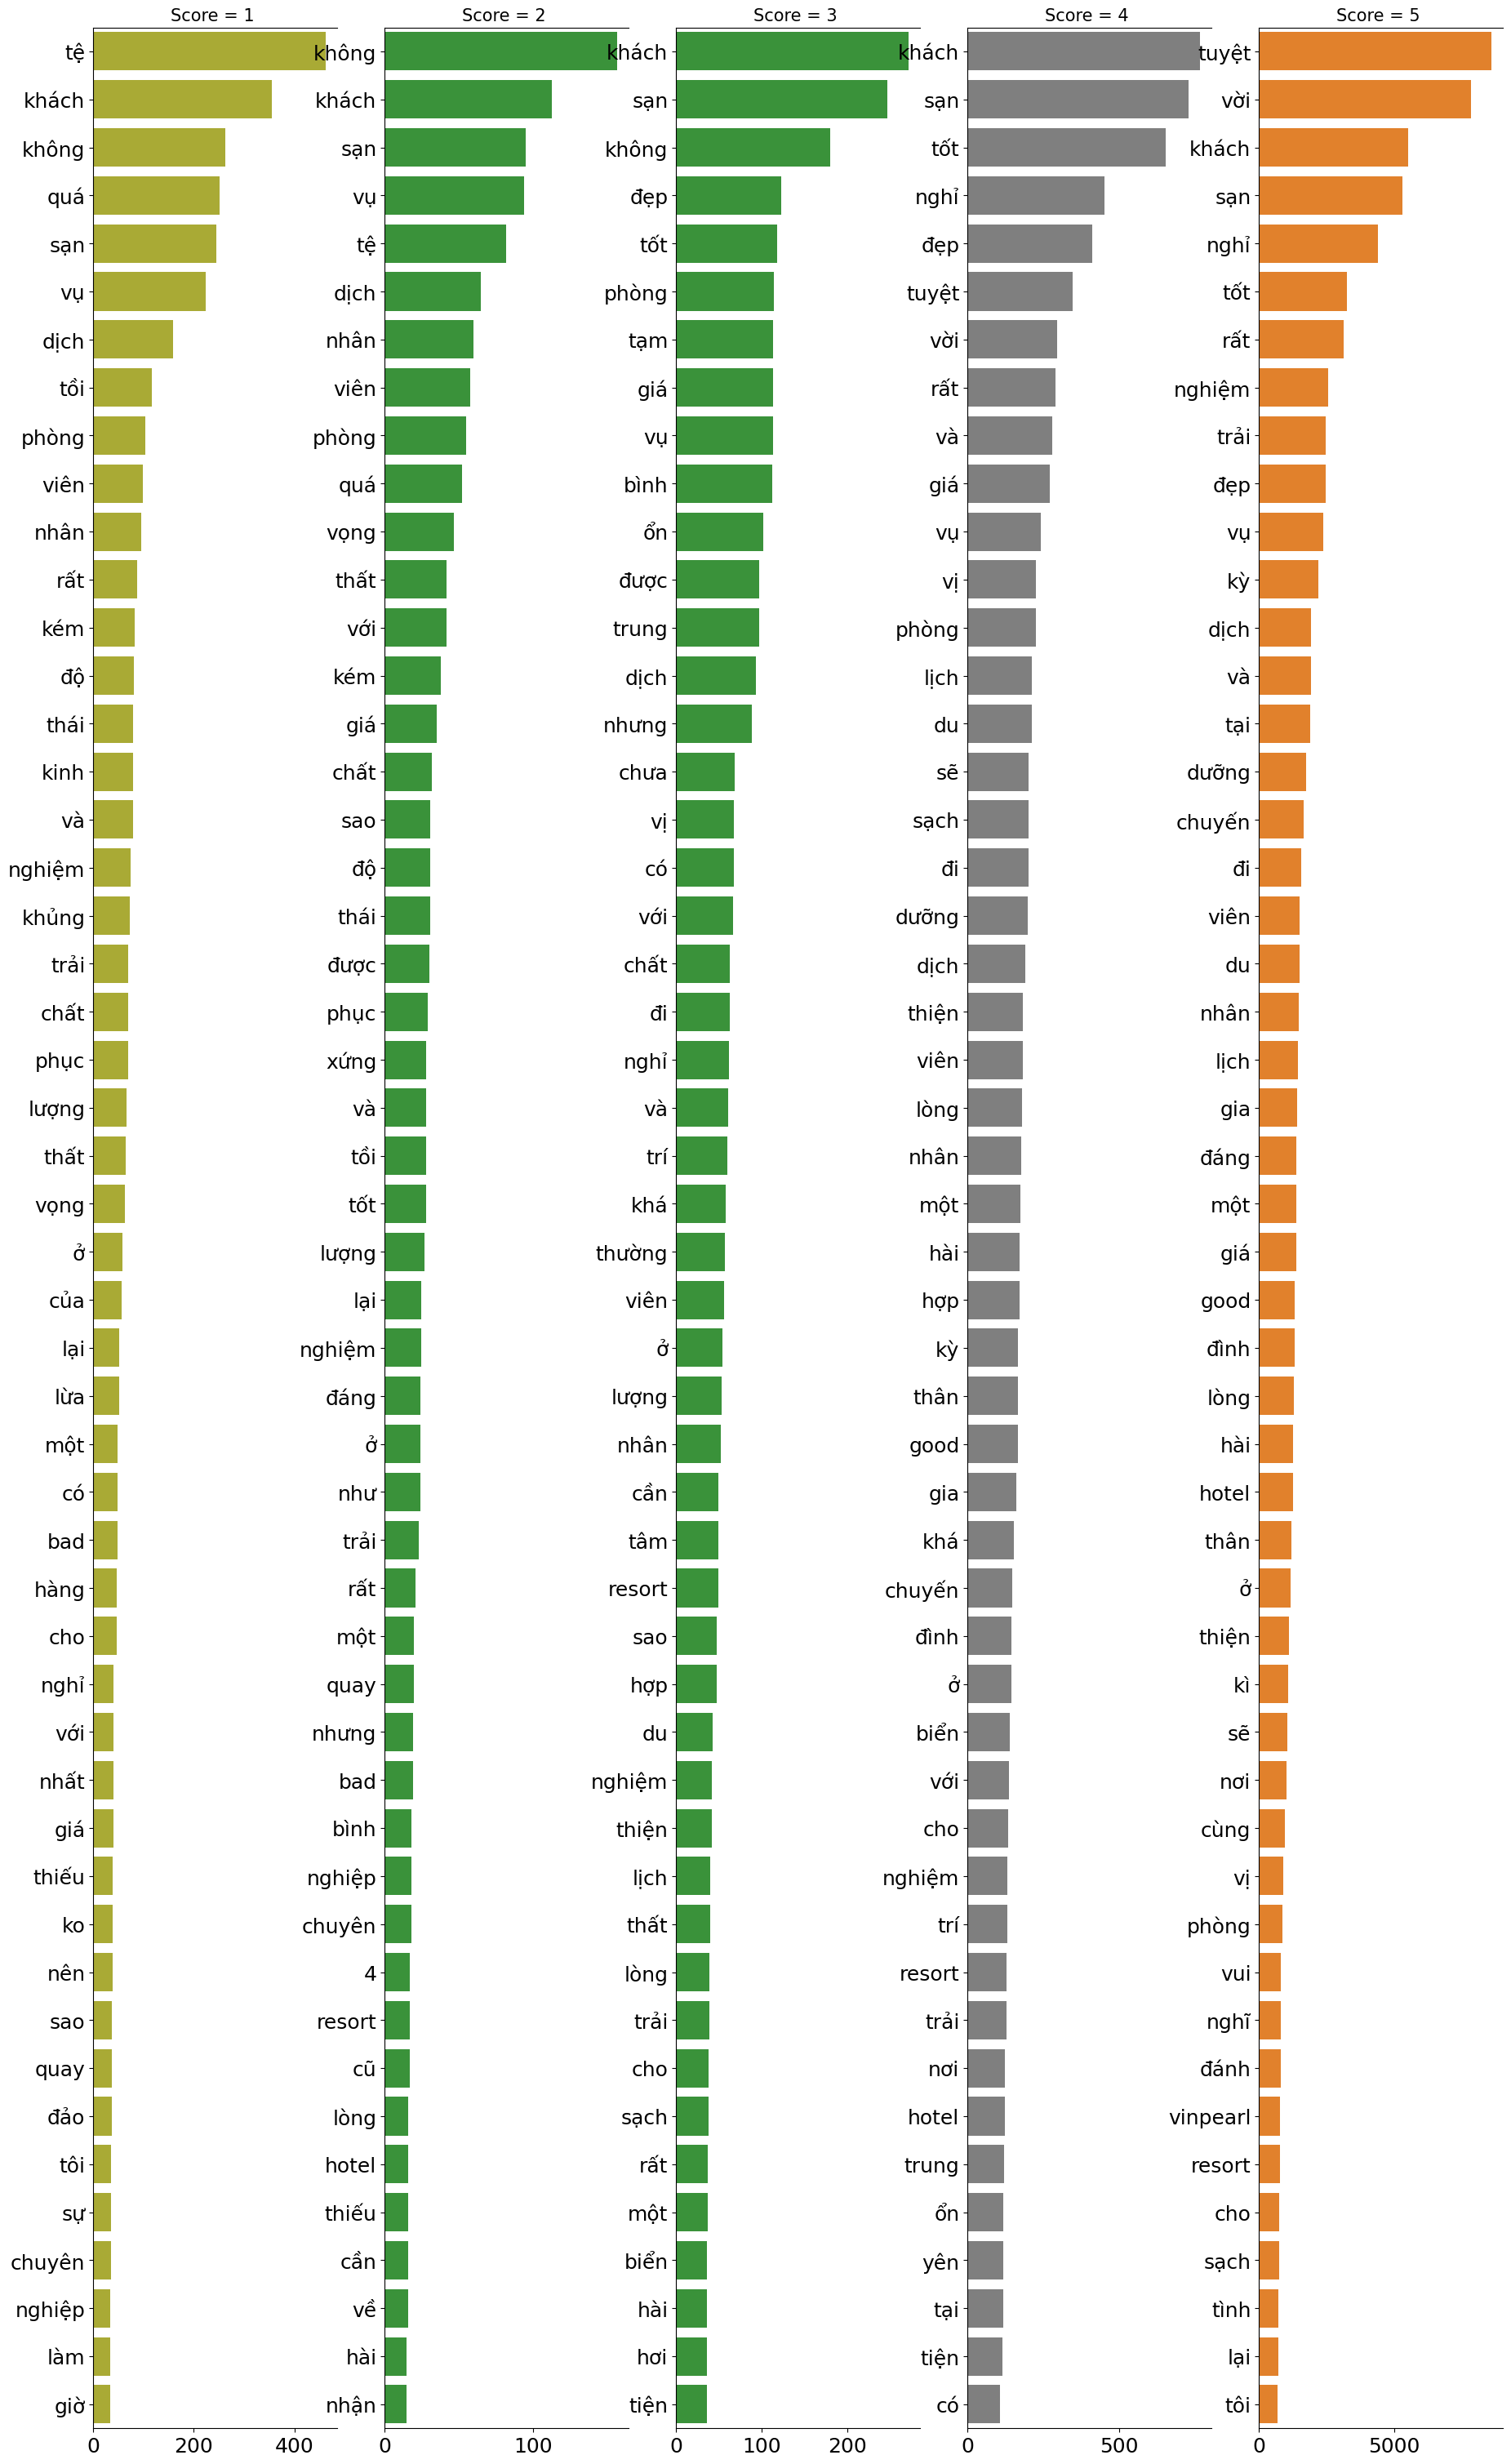

In [27]:
draw_ngrams("unigrams",unigrams, 50)

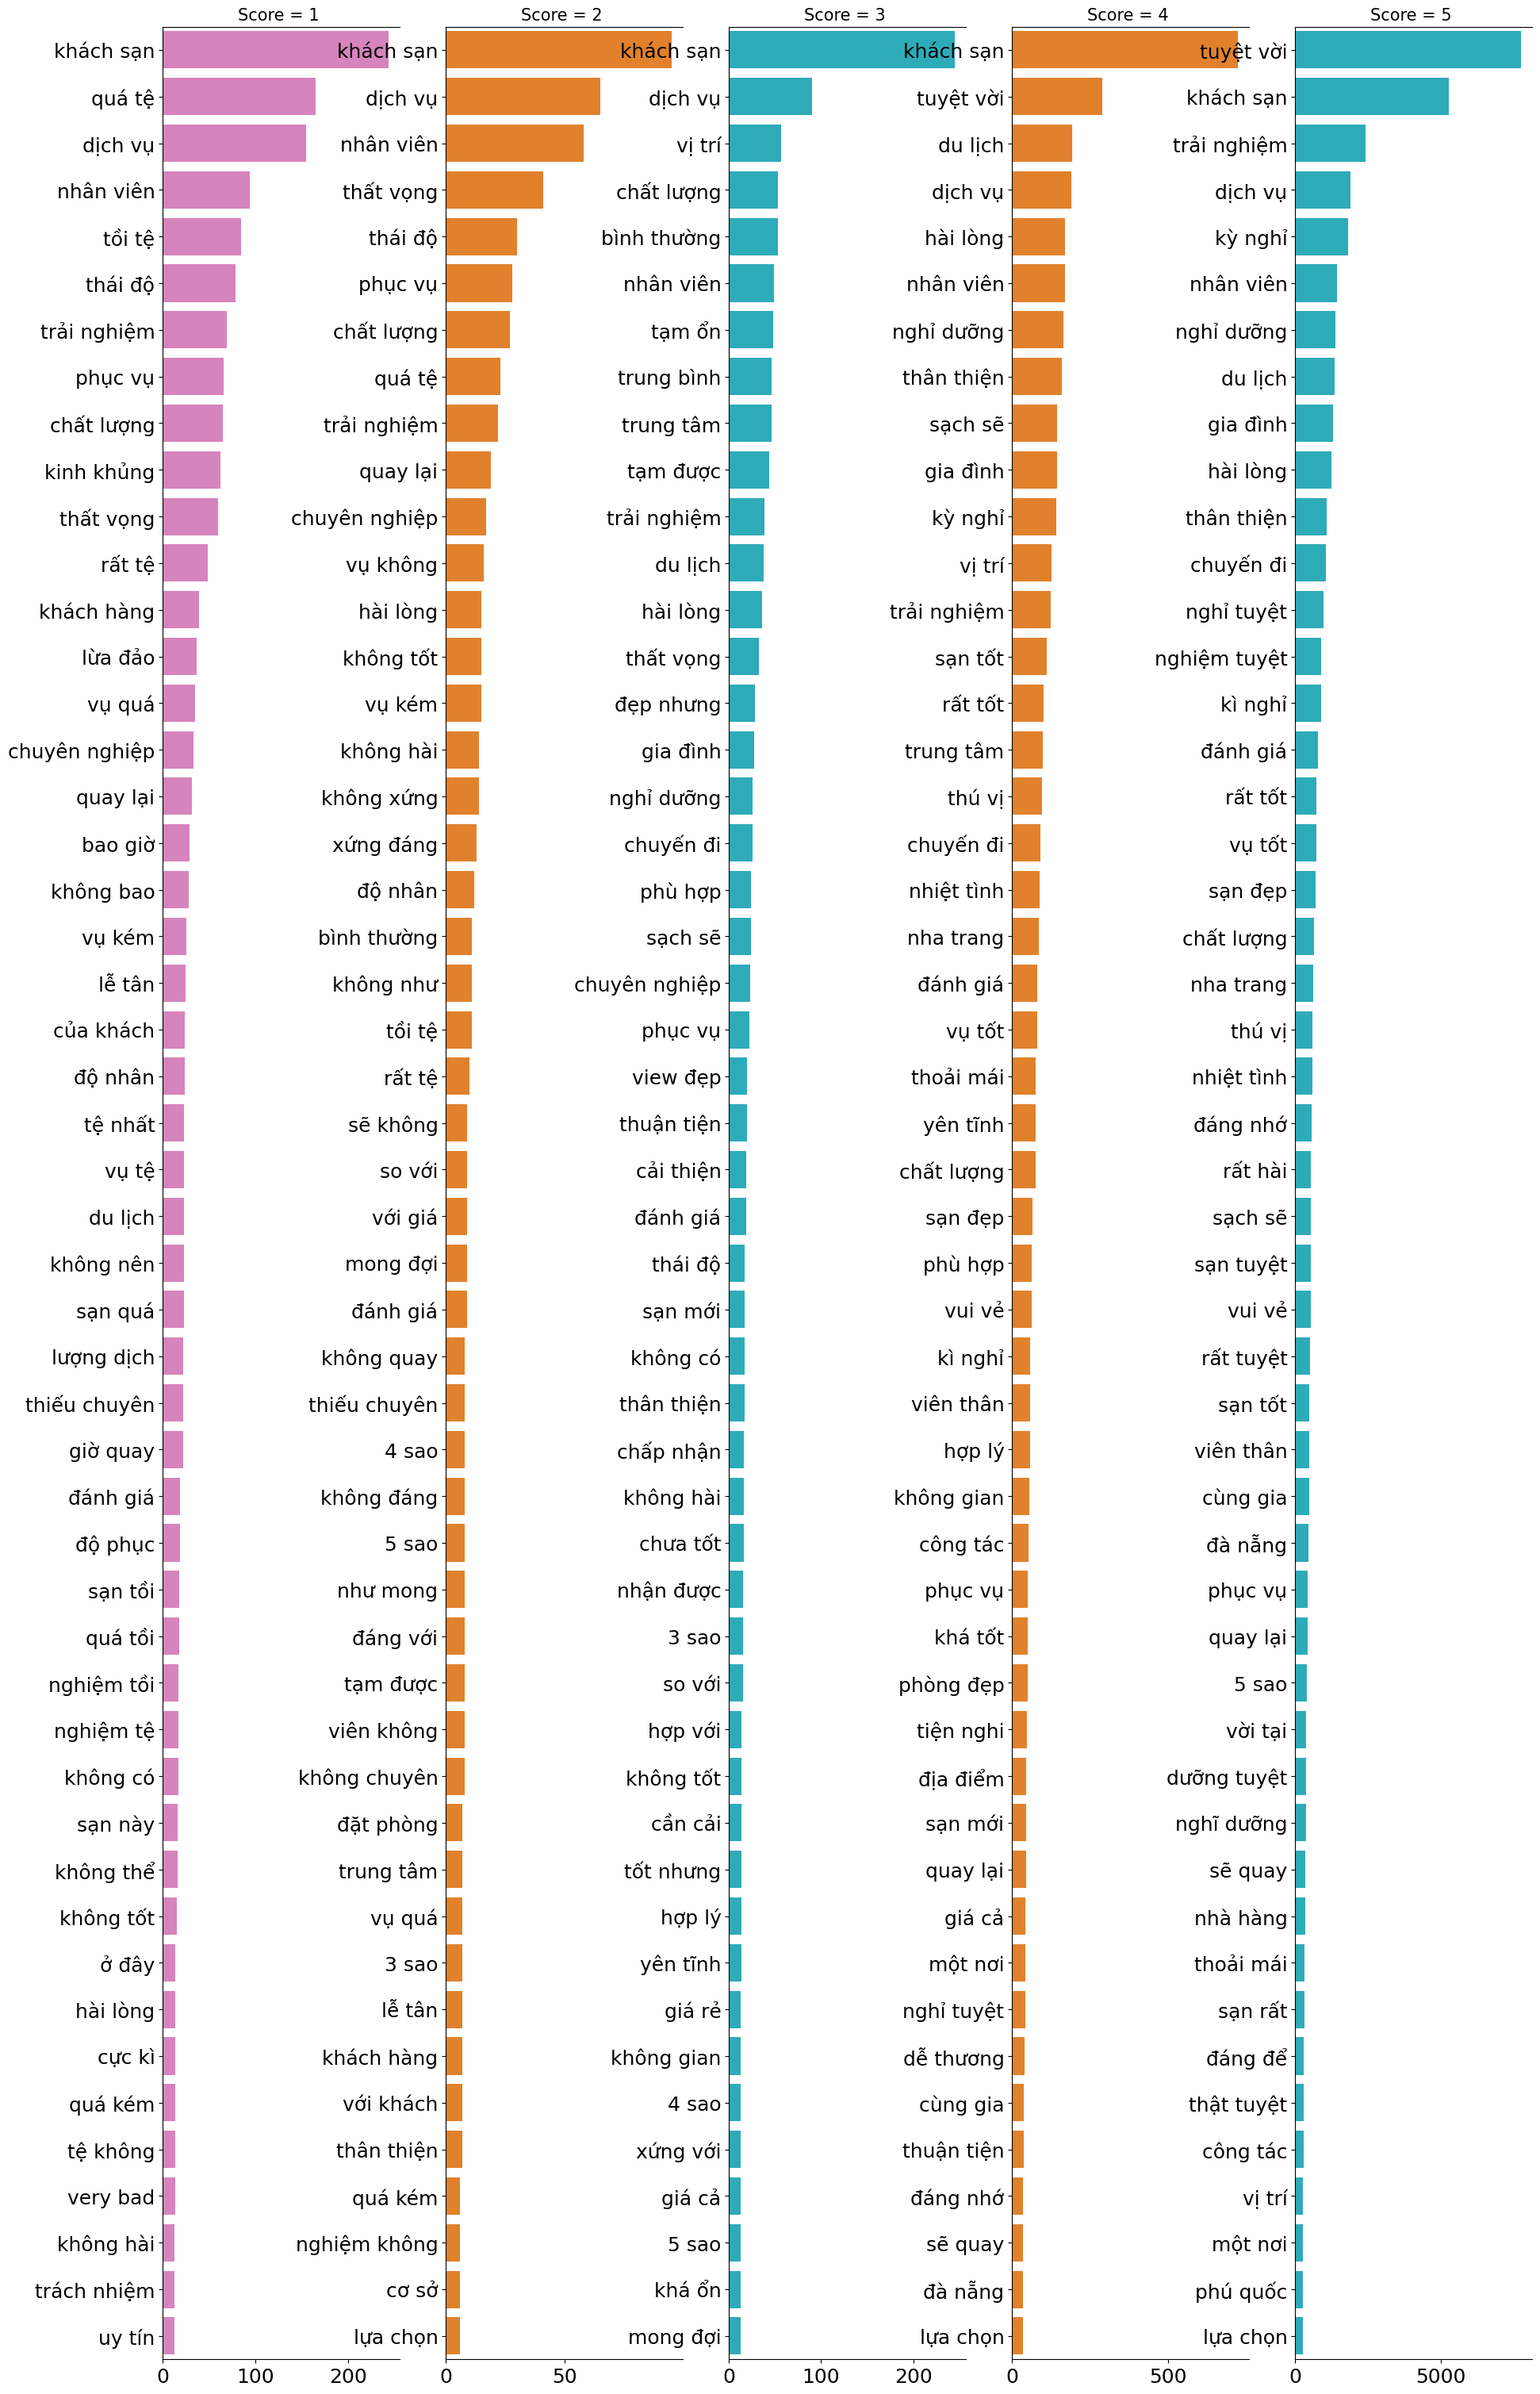

In [28]:
draw_ngrams("bigrams", bigrams, 50)

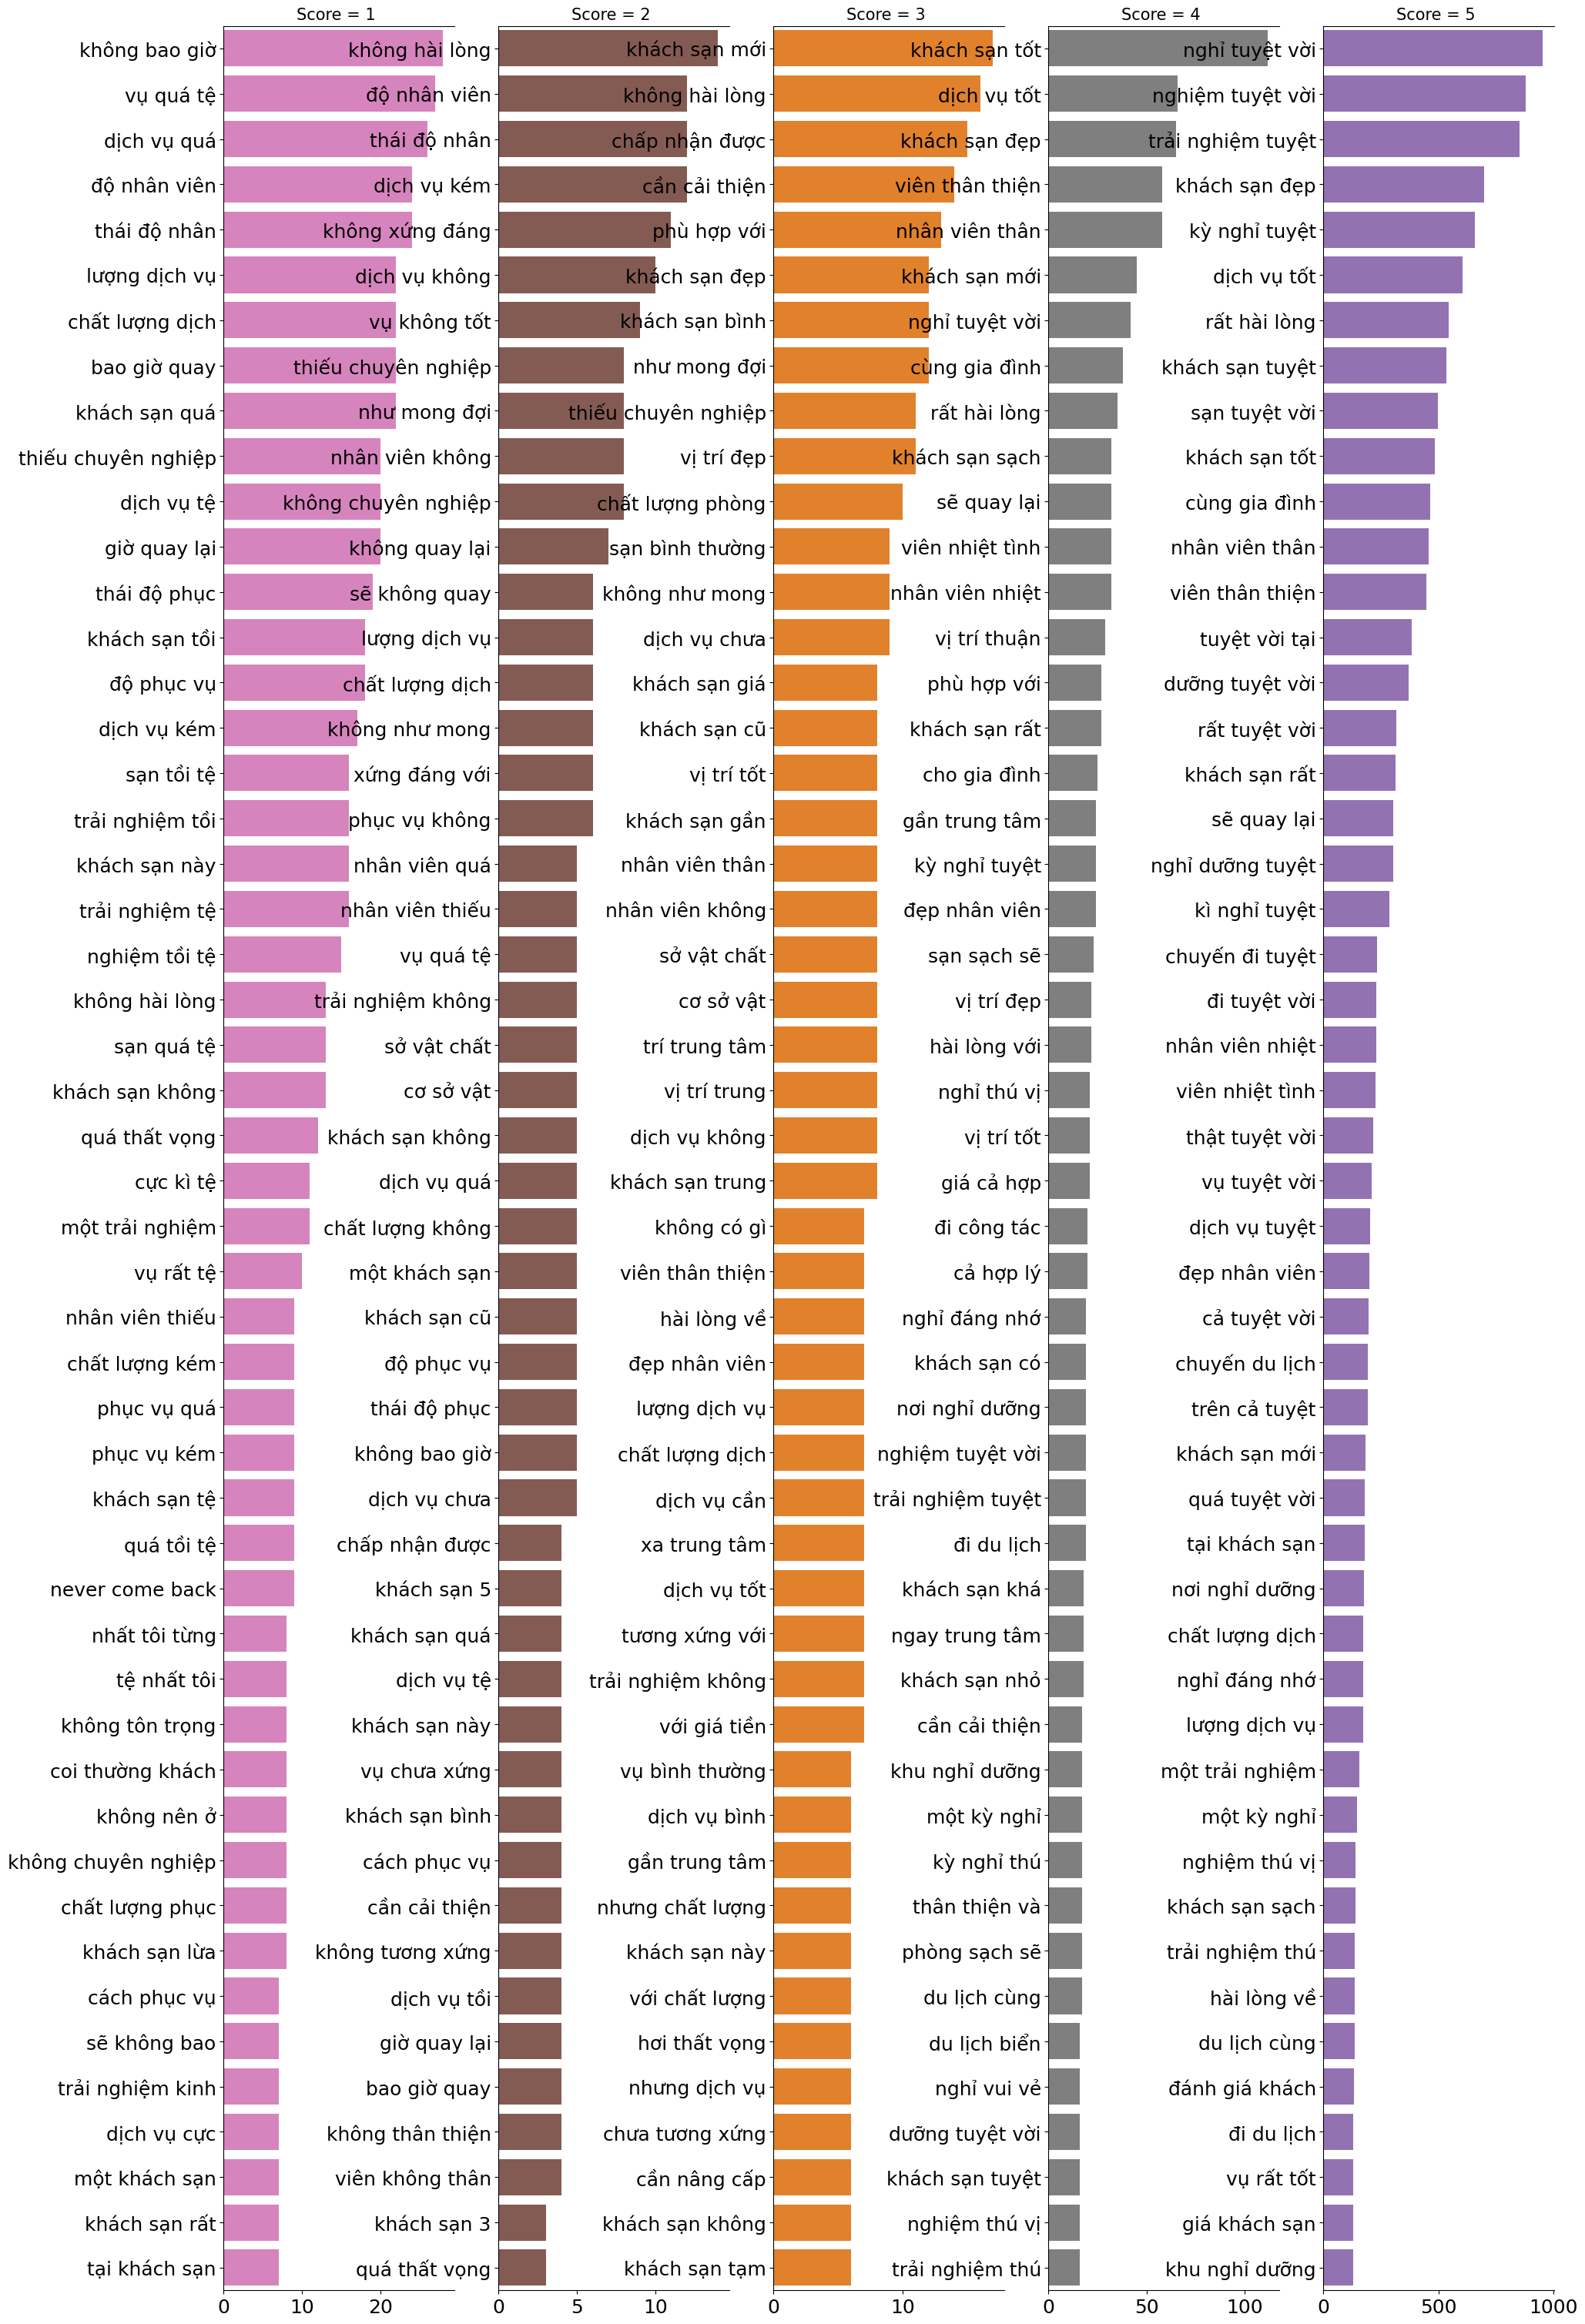

In [29]:
draw_ngrams("trigrams", trigrams, 50)

In [32]:
vi_df

score                                   title  \
0        5.0                        TRẢI NGHIỆM TỐT.   
1        5.0                              Tuyệt vời.   
2        5.0  trải nghiệm tuyệt vời tại Brandi Gate.   
3        1.0                          Tồi , lừa đảo.   
4        1.0                               Very bad.   
...      ...                                     ...   
48038    5.0                     Lần thứ 2 quay lại.   
48039    4.0            Giá rẻ nhân viên thân thiện.   
48040    5.0                     Giá rẻ, đồ ăn ngon.   
48041    5.0  Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng.   
48042    5.0                               Công tác.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    review  \
0                                                                                                                                                                                                                                                                                                            Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon Hồ bơi đẹp Vị trí di chuyển thuận lợi gần Hồ Tây Phòng nhỏ nhưng sang trọng rất đẹp, phòng có View thoáng  Có khu tầng cao rooftop rất thích . Cảm ơn khách sạn    
1                                                                                                                                                                                                                    Khách sạn mới, sạch sẽ, có bar và bể bơi ở tầng thượng, có view đẹp nhìn ra sông, vị trí rất thuận tiện cho việc đi lại, phòng nghỉ bố trí hài hòa, tiện nghi, ăn sáng ngon. Tôi hài lòng từ khâu đón tiếp đến cách phục vụ của khách sạn, nhân viên rất nhiệt tình và chu đáo. Chắc chắn sẽ ghé lại.   
2                                                                                                                                                                                  Khách sạn mới 100% tọa lạc trước sông Tô Lịch, ngay cửa ngõ sân bay Nội Bài vào thành phố, rất thuận tiện cho khách đi công tác. Phòng nhỏ xinh xắn, tiện nghi, yên tĩnh,view nhìn ra sông rất thơ mộng. Nhân viên cực kỳ dễ thương, hòa đồng thân thiện và lịch thiệp. Sẽ ghé lại Brandi Gate trong các chuyến công tác Hà nội sắp tới   
3      Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có việc gấp bay về nên bạn của mình trả trước 1 phòng ,dư lại 2 đêm . Đã không hoàn tiền còn lấy lại phòng đó cho khách khác vào ở . Còn lại 1 của mình, đến ngày check out, mình xin trả phòng muộn thì nhân viên bắt tính phụ phí . Mình vẫn chấp nhận, nhân viên lễ tân nói đến 14:00 thì 200k mình Ok, nhưng vì chuyến bay mình hơi muộn chút nên xin linh hoạt cho mình đến 15:00 , thì không chịu, nhất định phải đúng giờ ( dù gì mình cũng dư 1 phòng 2 đêm ...   
4                                                                                                                                                                                                                                                                                            Diện tích phòng quá nhỏ. Trang thiết bị quá cũ kỹ.  Toilet khong được sạch sẽ và tương đối kinh khủng. Tôi đặt phòng family mà diện tích chỉ  đủ cho 2 giường và extra bed.  Tóm lại,  tôi không hài lòng về dịch vụ tại đây!   
...                                                                                                                                                                                                                                                                               

In [35]:
vi_df.to_csv("../data/AERA02_AptitudeAssessment_Dataset_NLP_cleaned_vi.csv", index=False)

<Axes: >

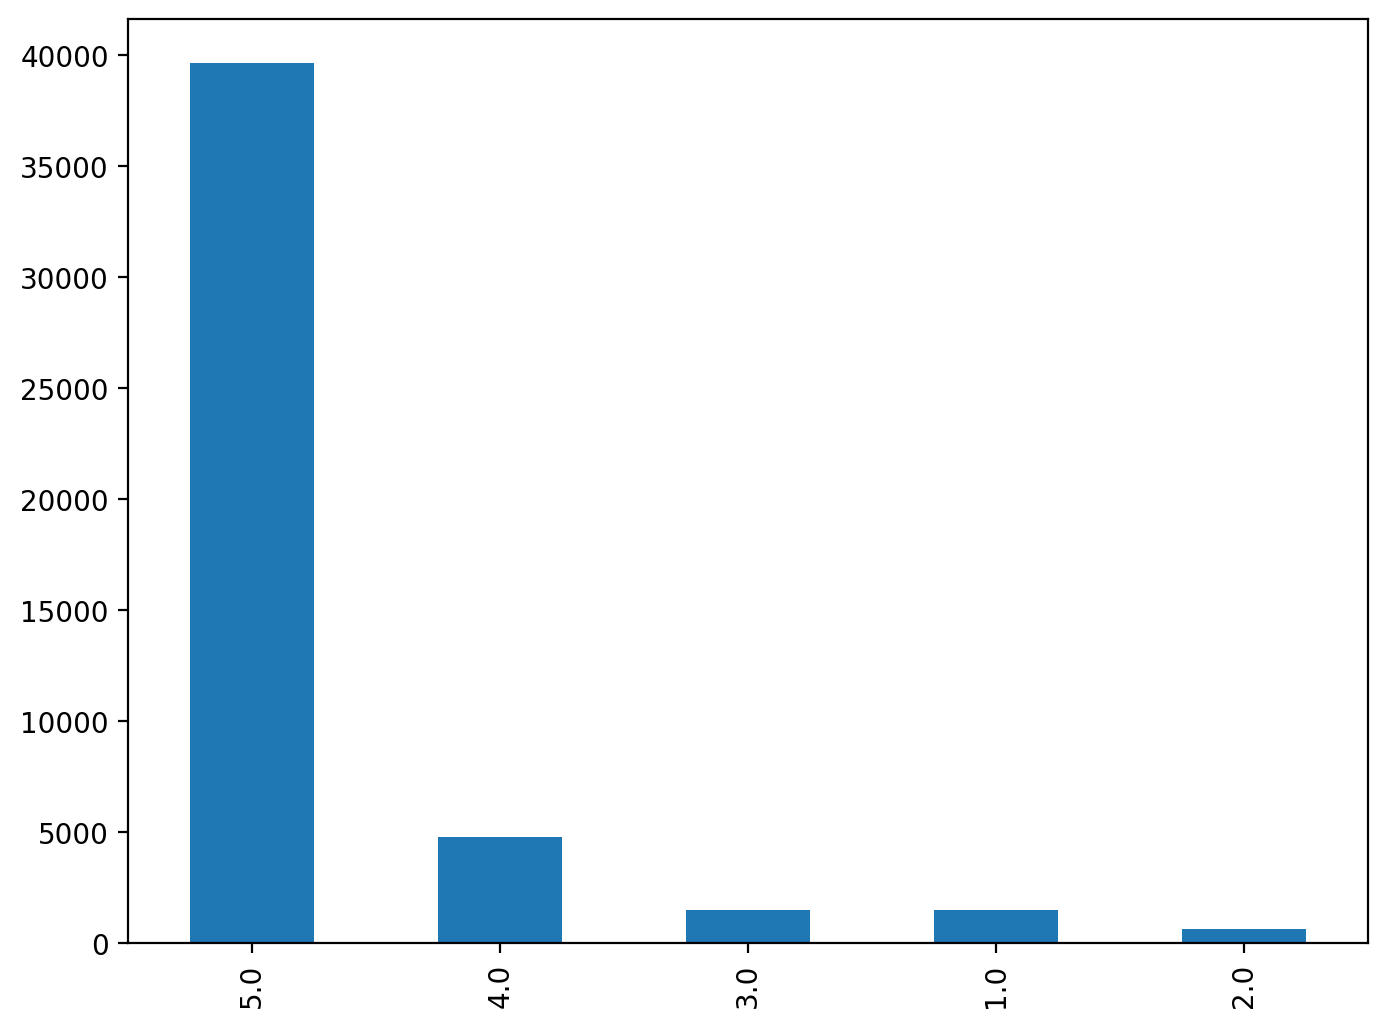

In [36]:
plt.figure(figsize=(8, 6), dpi=200)
vi_df["score"].value_counts().plot(kind="bar")

---

In [30]:
data2plot = {}
words = set()
for score, counter in score_dict.items():
    print(f"Score {score}:")
    print(counter.most_common(10))
    words.update([i[0] for i in counter.most_common(50)])
    
for score, counter in score_dict.items():
    data2plot[score] = [counter[word] for word in words]
    

Score 1.0:
[('không', 3994), ('phòng', 3814), ('khách', 3708), ('có', 3027), ('tôi', 2671), ('và', 2434), ('mình', 2404), ('thì', 2398), ('là', 2063), ('sạn', 1957)]
Score 2.0:
[('không', 1699), ('phòng', 1668), ('có', 1391), ('khách', 1327), ('và', 1013), ('tôi', 934), ('mình', 875), ('thì', 861), ('là', 799), ('sạn', 760)]
Score 3.0:
[('có', 2771), ('phòng', 2673), ('không', 2606), ('khách', 2528), ('và', 1979), ('sạn', 1648), ('là', 1382), ('nhưng', 1279), ('ở', 1257), ('mình', 1253)]
Score 4.0:
[('khách', 3481), ('và', 3477), ('có', 3339), ('rất', 3196), ('phòng', 3003), ('sạn', 2614), ('tôi', 2232), ('viên', 2040), ('nhân', 1957), ('ở', 1878)]
Score 5.0:
[('rất', 12104), ('và', 10722), ('khách', 7808), ('có', 6915), ('tôi', 6667), ('viên', 6275), ('sạn', 6178), ('nhân', 6006), ('phòng', 5543), ('sẽ', 5498)]


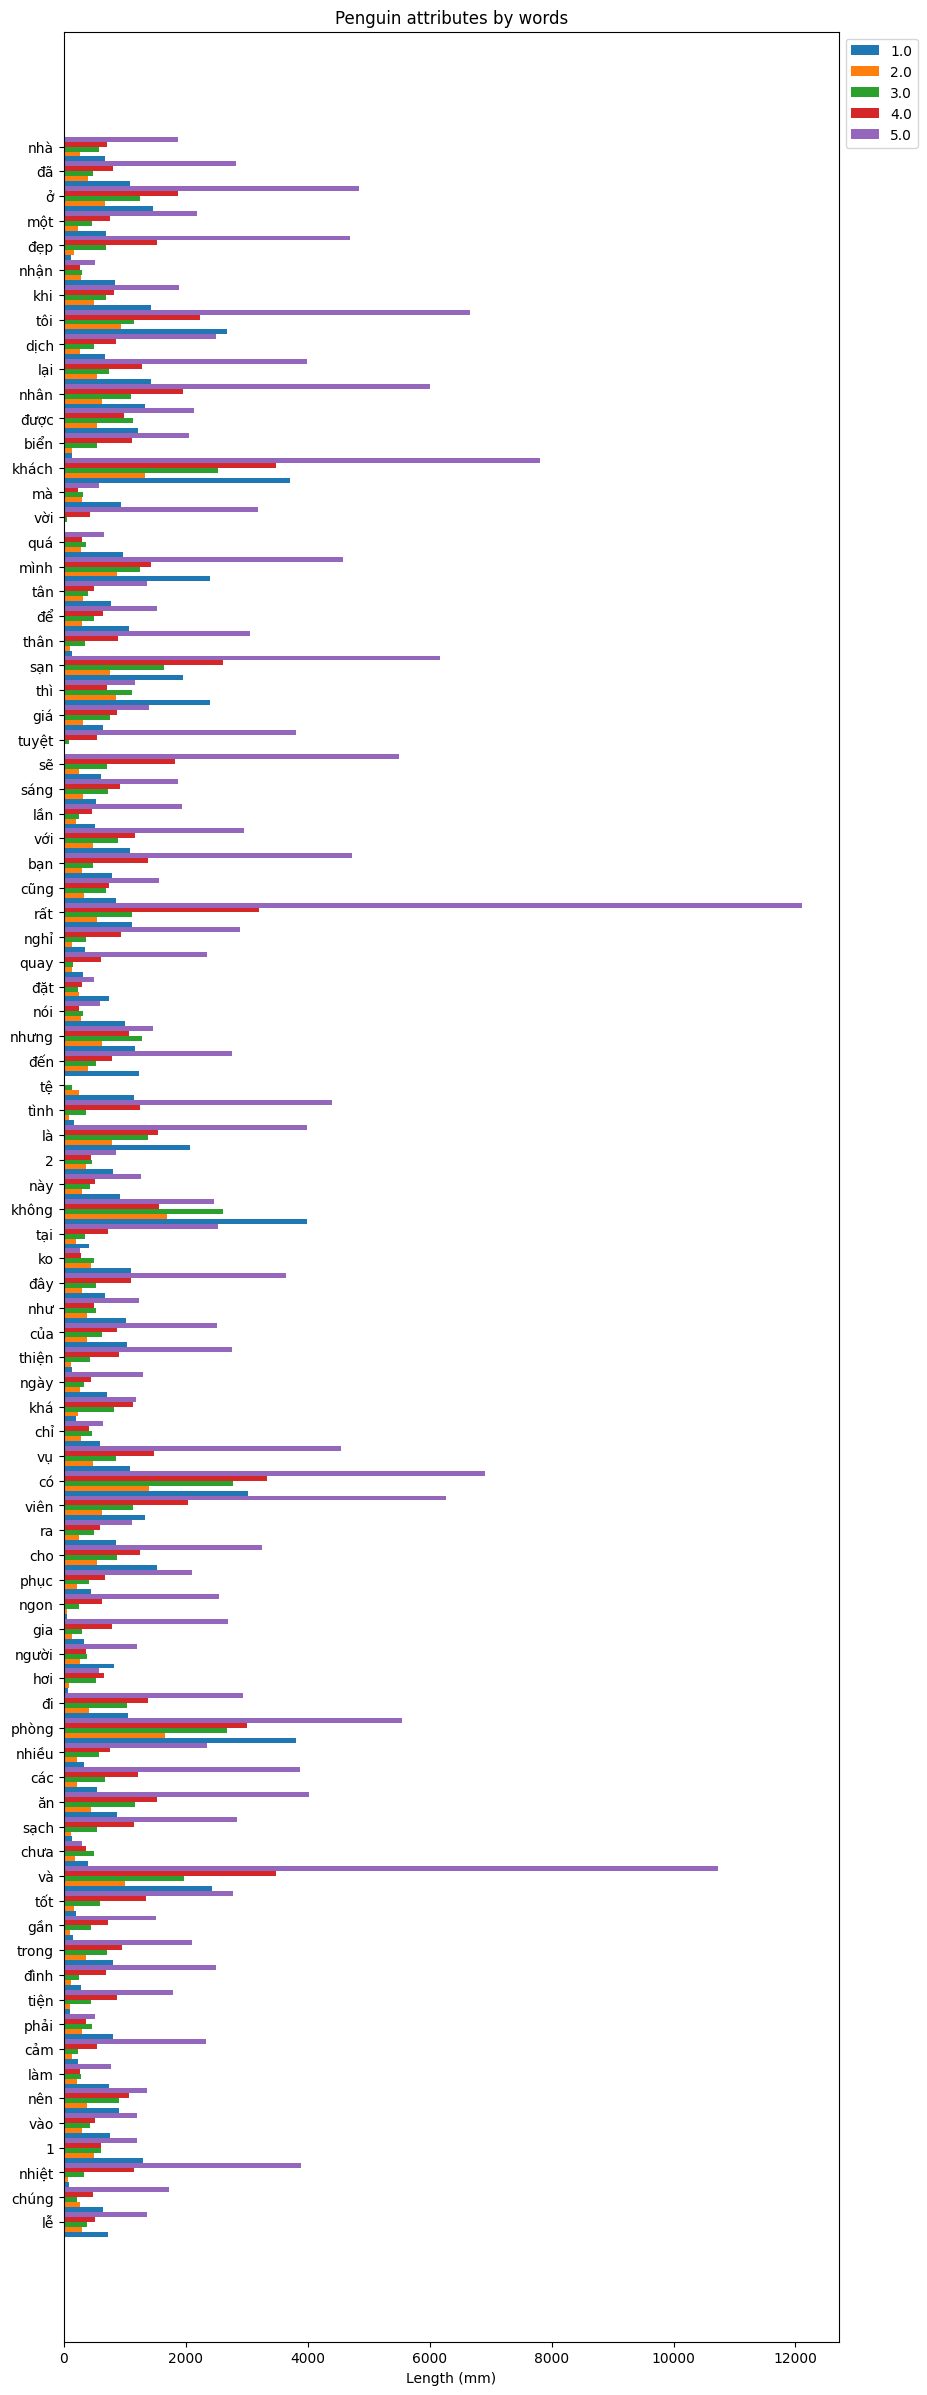

In [31]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(words))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 30))

attributes = list(data2plot.keys())
measurements = list(data2plot.values())

for i, measurement in enumerate(measurements):
    offset = width * (i - len(attributes) / 2)
    rects = ax.barh(x + offset, measurement, width, label=attributes[i])  # Switched x and y axis
    # ax.bar_label(rects, padding=3)

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_xlabel('Length (mm)')  # Switched x and y axis labels
ax.set_title('Penguin attributes by words')
ax.set_yticks(x)  # Switched x and y axis ticks
ax.set_yticklabels(words)  # Switched x and y axis tick labels
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()